In [14]:
import numpy as np
import matplotlib.pyplot as plt
import DataPreprocessing
from functools import reduce

In [36]:
def graph_data(me_filename, mom_filename, comb_str):    
    me_raw = np.load(me_filename, allow_pickle=True) #Matrix elements
    mom_raw = np.load(mom_filename, allow_pickle=True, encoding='bytes') #4-momenta of inputs
    mom_raw = np.array([np.array(element) for element in mom_raw])
    ##Flatten Momentum
    mom = np.array([np.ndarray.flatten(np.array(element)) for element in mom_raw])
    
    mandel_vars = reduce(np.multiply, DataPreprocessing.mandel_creation(['1,3','1,4','2,3','2,4'], mom))
    me = np.multiply(me_raw, mandel_vars)

    return (me_raw, DataPreprocessing.mandel_creation([comb_str], mom)[0])

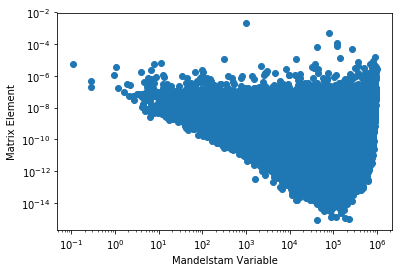

In [37]:

#me, S = graph_data('LO/MG_uuxg/3Jet_500000.npy', 'LO/LO_3_0.01_NJet/PS3_0.01_500000.npy', '3,5')
#me, S = graph_data('LO/MG_uuxg_2/me_3jet_1000000.npy', 'LO/MG_uuxg_2/mom_3jet_1000000.npy', '1,3')
me, S = graph_data('LO/MG_uuuxux/me_4jet_1000000', 'LO/MG_uuuxux/mom_4jet_1000000', '1,4')

plt.yscale('log')
plt.xscale('log')

plt.ylabel('Matrix Element')
plt.xlabel('Mandelstam Variable')
plt.scatter(S, me)